In [5]:
# pip install geocoder
!pip install reverse_geocoder

  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268088 sha256=77d01a410a559781e9d075191968c1ec0f81ff910a79d0a0c5901047ac5e41b6
  Stored in directory: c:\users\salah\appdata\local\pip\cache\wheels\10\05\be\d2edd4ff207cf625ce8bd20cf1493c27838828e8920aff9f4e
Successfully built reverse-geocoder


In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point

import geocoder
import time

import reverse_geocoder as rg

import matplotlib.pyplot as plt


In [3]:
# Open the shapefile
Provinces = gpd.GeoDataFrame.from_file('PROVINCES HCP.json')
Provinces = Provinces[['Nom_Provin','geometry']]
Provinces.rename(columns={'Nom_Provin':'Ville'},inplace=True)
Provinces

,Ville,geometry
0,Tanger-Assilah,"POLYGON ((-5.71467 35.61432, -5.71365 35.61831..."
1,Tétouan,"POLYGON ((-5.26616 35.60680, -5.27095 35.60592..."
2,M'Diq-Fnideq,"POLYGON ((-5.26616 35.60680, -5.26659 35.60775..."
3,Berkane,"POLYGON ((-2.20883 35.04129, -2.20879 35.04151..."
4,Driouch,"POLYGON ((-3.19626 35.22681, -3.19762 35.22610..."
...,...,...
70,Es-Semara,"POLYGON ((-8.63820 27.14359, -8.66792 27.14083..."
71,Laâyoune,"POLYGON ((-12.29973 26.86303, -12.36875 26.922..."
72,Tarfaya,"POLYGON ((-11.48480 27.80744, -11.51013 27.818..."
73,Aousserd,"POLYGON ((-13.11220 22.76925, -13.14540 22.773..."


In [4]:
# Select Rabat Polygon only
Provinces = Provinces[Provinces.Ville=="Rabat"]

#Import Data and preparing geodataframe
data = pd.read_csv('data/working/Irys/macro_table_Irys_data_rabat/macro_table_Irys_data_rabat.csv')
# data['latitude']=data.apply(lambda x: str(x["location"]).replace("{'latitude': ",'').replace(" 'longitude': ",'').replace("}",'').split(',')[0], axis=1)
# data['longitude']=data.apply(lambda x: str(x["location"]).replace("{'latitude': ",'').replace(" 'longitude': ",'').replace("}",'').split(',')[1], axis=1)
# data['latitude']=data['latitude'].astype(float)
# data
data['longitude']=data['longitude'].astype(float)

from shapely.geometry import Point
data['coords'] = list(zip(data['longitude'],data['latitude']))
data['coords'] = data['coords'].apply(Point)

data

,deviceId,latitude,longitude,datetime,day,hour,coords
0,9991d70c-a4c0-4b1c-97b1-3e24450404ed,33.97714,-6.82065,2022-04-23T08:59:13.000Z,23,8,POINT (-6.82065 33.97714)
1,99a80f48-0eac-46bf-9d5f-261fe6e34623,33.97458,-6.88802,2022-04-23T03:37:39.000Z,23,3,POINT (-6.88802 33.97458)
2,99a80f48-0eac-46bf-9d5f-261fe6e34623,33.97455,-6.88799,2022-04-23T22:01:05.000Z,23,22,POINT (-6.88799 33.97455)
3,99a80f48-0eac-46bf-9d5f-261fe6e34623,33.97458,-6.88797,2022-04-23T22:11:33.000Z,23,22,POINT (-6.88797 33.97458)
4,99a80f48-0eac-46bf-9d5f-261fe6e34623,33.97458,-6.88802,2022-04-23T02:08:17.000Z,23,2,POINT (-6.88802 33.97458)
...,...,...,...,...,...,...,...
3000064,3743b17f-beb3-4a87-854f-ab79df39f19e,33.98528,-6.80674,2022-04-29T22:58:35.000Z,29,22,POINT (-6.80674 33.98528)
3000065,43fe1c35-067e-4fbe-ae2c-51a956cffeb3,34.00143,-6.81256,2022-04-27T03:55:41.000Z,27,3,POINT (-6.81256 34.00143)
3000066,98fa7980-378b-4cf9-be06-157be88784ec,33.99300,-6.81024,2022-04-15T01:02:05.000Z,15,1,POINT (-6.81024 33.993)
3000067,f0f8968f-ace1-4728-9f4d-3baf65bbaa5e,33.97999,-6.88480,2022-04-26T18:47:54.000Z,26,18,POINT (-6.8848 33.97999)


In [5]:
start = time.time()
#Select Rabat Polygon only
# Provinces = Provinces[Provinces.Ville=="Rabat"]

# #Import Data and preparing geodataframe
# data = pd.read_csv('data/working/Irys/macro_table_Irys_data_rabat/macro_table_Irys_data_rabat.csv')
# # data['latitude']=data.apply(lambda x: str(x["location"]).replace("{'latitude': ",'').replace(" 'longitude': ",'').replace("}",'').split(',')[0], axis=1)
# # data['longitude']=data.apply(lambda x: str(x["location"]).replace("{'latitude': ",'').replace(" 'longitude': ",'').replace("}",'').split(',')[1], axis=1)
# # data['latitude']=data['latitude'].astype(float)
# # data
# data['longitude']=data['longitude'].astype(float)
# data['coords'] = list(zip(data['longitude'],data['latitude']))
# data['coords'] = data['coords'].apply(Point)
datageo = gpd.GeoDataFrame(data.iloc[: ,:], geometry='coords', crs=Provinces.crs)

# Perform spatial join to match points and polygons
datageo = gpd.tools.sjoin(datageo, Provinces, predicate="within", how='left')

datageo.drop(columns={'index_right'},inplace=True)
end = time.time()

In [20]:
regions = gpd.GeoDataFrame.from_file('geojson_MA.json')


In [6]:
end-start

395.4197552204132

In [7]:
datageo.fillna('Not_Rabat',inplace=True)
pnt_Rabat = datageo[datageo.Ville=='Rabat']
datageo.Ville.value_counts()

Rabat        2973785
Not_Rabat      26284
Name: Ville, dtype: int64

### Visualization

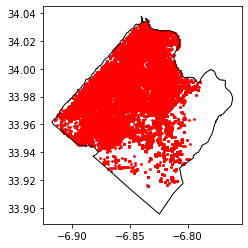

In [8]:
base = Provinces.boundary.plot(linewidth=1, edgecolor="black")
pnt_Rabat.plot(ax=base, linewidth=1, color="red", markersize=3)
plt.show()

In [10]:
pnt_Rabat.loc[pnt_Rabat.latitude<33.95]

,deviceId,latitude,longitude,datetime,day,hour,coords,Ville
436,8f341d44-c4fb-49bc-8df8-c251db5772a9,33.94524,-6.87102,2022-04-23T15:19:01.000Z,23,15,POINT (-6.87102 33.94524),Rabat
437,8f341d44-c4fb-49bc-8df8-c251db5772a9,33.94537,-6.87087,2022-04-23T01:08:16.000Z,23,1,POINT (-6.87087 33.94537),Rabat
438,8f341d44-c4fb-49bc-8df8-c251db5772a9,33.94507,-6.87071,2022-04-23T00:44:24.000Z,23,0,POINT (-6.87071 33.94507),Rabat
439,8f341d44-c4fb-49bc-8df8-c251db5772a9,33.94522,-6.87105,2022-04-23T22:34:37.000Z,23,22,POINT (-6.87105 33.94522),Rabat
440,8f341d44-c4fb-49bc-8df8-c251db5772a9,33.94524,-6.87102,2022-04-23T00:52:45.000Z,23,0,POINT (-6.87102 33.94524),Rabat
...,...,...,...,...,...,...,...,...
2999927,93fb8583-0d35-4ed0-929c-a51c680999e6,33.94824,-6.87143,2022-04-26T23:37:16.000Z,26,23,POINT (-6.87143 33.94824),Rabat
3000033,93fb8583-0d35-4ed0-929c-a51c680999e6,33.94807,-6.87137,2022-04-29T21:58:45.000Z,29,21,POINT (-6.87137 33.94807),Rabat
3000034,93fb8583-0d35-4ed0-929c-a51c680999e6,33.94821,-6.87093,2022-04-29T23:40:36.000Z,29,23,POINT (-6.87093 33.94821),Rabat
3000035,93fb8583-0d35-4ed0-929c-a51c680999e6,33.94627,-6.87308,2022-04-29T22:00:12.000Z,29,22,POINT (-6.87308 33.94627),Rabat


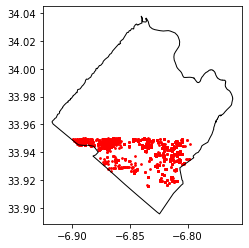

In [11]:
base = Provinces.boundary.plot(linewidth=1, edgecolor="black")
pnt_Rabat.loc[pnt_Rabat.latitude<33.95].plot(ax=base, linewidth=1, color="red", markersize=3)
plt.show()

In [22]:
datageo

,deviceId,latitude,longitude,datetime,day,hour,coords,Ville
0,9991d70c-a4c0-4b1c-97b1-3e24450404ed,33.97714,-6.82065,2022-04-23T08:59:13.000Z,23,8,POINT (-6.82065 33.97714),Rabat
1,99a80f48-0eac-46bf-9d5f-261fe6e34623,33.97458,-6.88802,2022-04-23T03:37:39.000Z,23,3,POINT (-6.88802 33.97458),Rabat
2,99a80f48-0eac-46bf-9d5f-261fe6e34623,33.97455,-6.88799,2022-04-23T22:01:05.000Z,23,22,POINT (-6.88799 33.97455),Rabat
3,99a80f48-0eac-46bf-9d5f-261fe6e34623,33.97458,-6.88797,2022-04-23T22:11:33.000Z,23,22,POINT (-6.88797 33.97458),Rabat
4,99a80f48-0eac-46bf-9d5f-261fe6e34623,33.97458,-6.88802,2022-04-23T02:08:17.000Z,23,2,POINT (-6.88802 33.97458),Rabat
...,...,...,...,...,...,...,...,...
3000064,3743b17f-beb3-4a87-854f-ab79df39f19e,33.98528,-6.80674,2022-04-29T22:58:35.000Z,29,22,POINT (-6.80674 33.98528),Rabat
3000065,43fe1c35-067e-4fbe-ae2c-51a956cffeb3,34.00143,-6.81256,2022-04-27T03:55:41.000Z,27,3,POINT (-6.81256 34.00143),Rabat
3000066,98fa7980-378b-4cf9-be06-157be88784ec,33.99300,-6.81024,2022-04-15T01:02:05.000Z,15,1,POINT (-6.81024 33.99300),Rabat
3000067,f0f8968f-ace1-4728-9f4d-3baf65bbaa5e,33.97999,-6.88480,2022-04-26T18:47:54.000Z,26,18,POINT (-6.88480 33.97999),Rabat


In [23]:
datageo.to_csv('data/working/Irys/macro_table_Irys_data_rabat/IrysData_Clean.csv', header=True)

In [ ]:
import plotly.express as px 

pandas_df=df

fig = px.scatter_mapbox(pandas_df.loc[:10000,:], lat="latitude", lon="longitude", 
                  size_max=15, zoom=10,
                  mapbox_style="carto-positron")
fig.show()